In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [6]:
# Проверим типы данных в каждом столбце
print(df.dtypes)

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [8]:
# Преобразуем "Дата" в формат datetime
df['Дата'] = pd.to_datetime(df['Дата'], format='%Y-%m-%d')

Сгруппируйте данные по дате, посчитайте количество продаж

In [10]:
# Группируем по дате и суммируем количество продаж
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()

Вывести несколько первых строк сгруппированных данных

In [12]:
# Посмотрим на первые строки сгруппированных данных
print(grouped_df.head())

        Дата  Количество
0 2018-01-04        3734
1 2018-01-05        3643
2 2018-01-06        3193
3 2018-01-07        3298
4 2018-01-09        4055


Нарисуйте график продаж у `grouped_df`

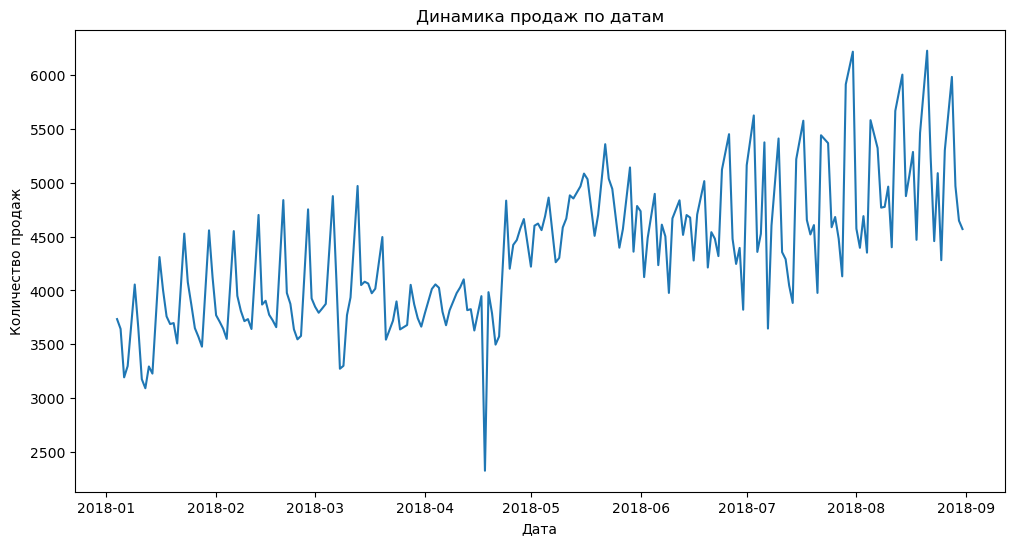

In [14]:
# Нарисуем график количества продаж по дате
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_df, x='Дата', y='Количество')
plt.title('Динамика продаж по датам')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [ ]:
График показывает рост количества продаж с начала 2018 года, с регулярными колебаниями, что может указывать на сезонные или недельные циклы спроса. В мае 2018 года видно резкое снижение продаж, что может быть выбросом или связано с внешними факторами, такими как праздники или сбои. Начиная с июня 2018 года, наблюдаются пики

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [16]:
# Найдем строку с максимальным значением "Количество" в исходных данных df
max_outlier = df[df['Количество'] == df['Количество'].max()]
print(max_outlier)

             Дата  Склад   Контрагент Номенклатура  Количество
218822 2018-06-28      1  address_208    product_0         200


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [18]:
# Фильтруем данные для склада 3, месяцев июнь, июль, август и дней недели среда
summer_df = df[(df['Склад'] == 3) & (df['Дата'].dt.month.isin([6, 7, 8])) & (df['Дата'].dt.weekday == 2)]

# Находим топовый товар по продажам
top_product = summer_df.groupby('Номенклатура')['Количество'].sum().idxmax()
print("Топовый товар:", top_product)

Топовый товар: product_1


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [50]:
import pandas as pd

# Загрузим данные о погоде
weather_df = pd.read_excel(r'C:\Users\Marzhan\Downloads\weather_data.xlsx') 

# Просмотр первых строк данных для понимания структуры
print(weather_df.head())

  # Метеостанция Астана, Казахстан, WMO_ID=35188, выборка с 01.10.2024 по 06.11.2024, Октябрь  \
0                                  # Кодировка: ANSI                                            
1  # Информация предоставлена сайтом "Расписание ...                                            
2  # Пожалуйста, при использовании данных, любезн...                                            
3  # Обозначения метеопараметров см. по адресу ht...                                            
4                                                  #                                            

  Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN      

In [52]:
# Пропускаем строки с информацией и заголовками, чтобы загрузить чистые данные
weather_df = pd.read_excel(r'C:\Users\Marzhan\Downloads\weather_data.xlsx', skiprows=6)

# Просмотр первых строк очищенных данных
print(weather_df.head())


  Местное время в Астане                    T     Po      P    Pa   U  \
0    2024-10-31 23:00:00  2024-01-03 00:00:00  731.1  763.1   0.0  95   
1    2024-10-31 20:00:00  2024-06-03 00:00:00  731.1  763.0  -0.8  92   
2    2024-10-31 17:00:00  2024-02-04 00:00:00  731.9  763.9  -1.7  92   
3    2024-10-31 14:00:00  2024-01-05 00:00:00  733.6  765.5  -0.9  85   
4    2024-10-31 11:00:00  2024-08-03 00:00:00  734.5  766.6  -0.9  89   

                                    DD  Ff  ff10  ff3  ...  \
0              Ветер, дующий с востока   1   NaN  NaN  ...   
1              Ветер, дующий с востока   1   NaN  NaN  ...   
2  Ветер, дующий с востоко-юго-востока   1   NaN  NaN  ...   
3                  Ветер, дующий с юга   1   NaN  NaN  ...   
4                  Ветер, дующий с юга   1   NaN  NaN  ...   

                                                  Cm   Ch   VV  \
0                                                NaN  NaN  NaN   
1                                                NaN  Na

In [62]:


# Преобразуем "Местное время в Астане" в формат datetime и выделим только дату
weather_df['Местное время в Астане'] = pd.to_datetime(weather_df['Местное время в Астане'], format='%d.%m.%Y %H:%M')
weather_df['Дата'] = weather_df['Местное время в Астане'].dt.date



In [64]:

# Рассчитываем среднюю температуру за каждый день
# Замените 'U' на фактическое название столбца, содержащего температуру, если оно отличается
weather_daily_avg = weather_df.groupby('Дата')['U'].mean().reset_index()
weather_daily_avg.rename(columns={'U': 'Средняя температура'}, inplace=True)




In [68]:
# Преобразуем столбец 'Дата' в тип datetime для weather_daily_avg
weather_daily_avg['Дата'] = pd.to_datetime(weather_daily_avg['Дата'])

# Убедимся, что типы данных совпадают
print(grouped_df['Дата'].dtype)  # Проверяем тип столбца в grouped_df
print(weather_daily_avg['Дата'].dtype)  # Проверяем тип столбца в weather_daily_avg

# Объединяем данные с grouped_df (таблицей продаж)
combined_df = pd.merge(grouped_df, weather_daily_avg, on='Дата', how='left')

# Проверим объединенные данные
print(combined_df.head())



datetime64[ns]
datetime64[ns]
        Дата  Количество  Средняя температура
0 2018-01-04        3734                  NaN
1 2018-01-05        3643                  NaN
2 2018-01-06        3193                  NaN
3 2018-01-07        3298                  NaN
4 2018-01-09        4055                  NaN


In [70]:
# Объединяем данные с grouped_df (таблицей продаж)
combined_df = pd.merge(grouped_df, weather_daily_avg, on='Дата', how='left')


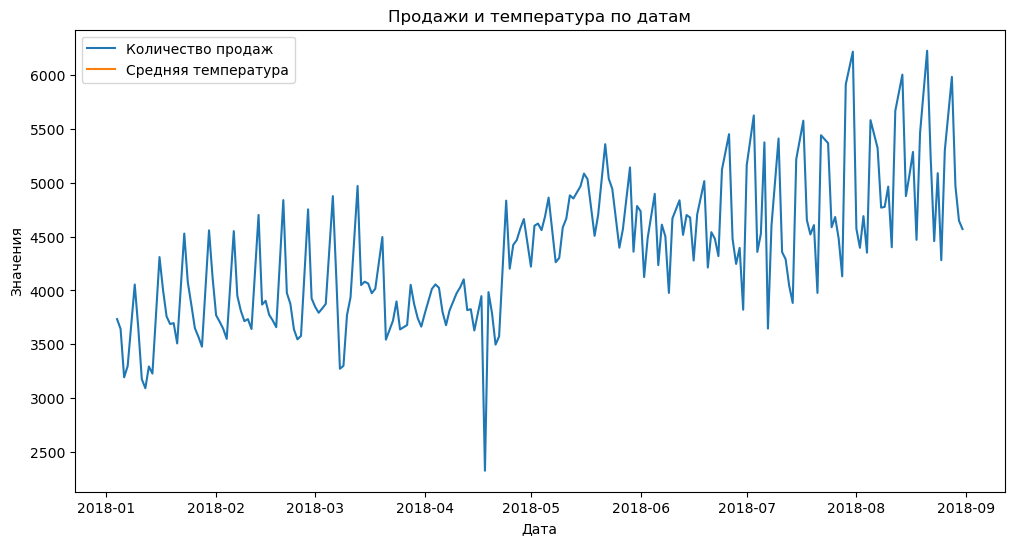

In [74]:
# Построим график продаж и температуры
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_df, x='Дата', y='Количество', label='Количество продаж')
sns.lineplot(data=combined_df, x='Дата', y='Средняя температура', label='Средняя температура')
plt.title('Продажи и температура по датам')
plt.xlabel('Дата')
plt.ylabel('Значения')
plt.legend()
plt.show()



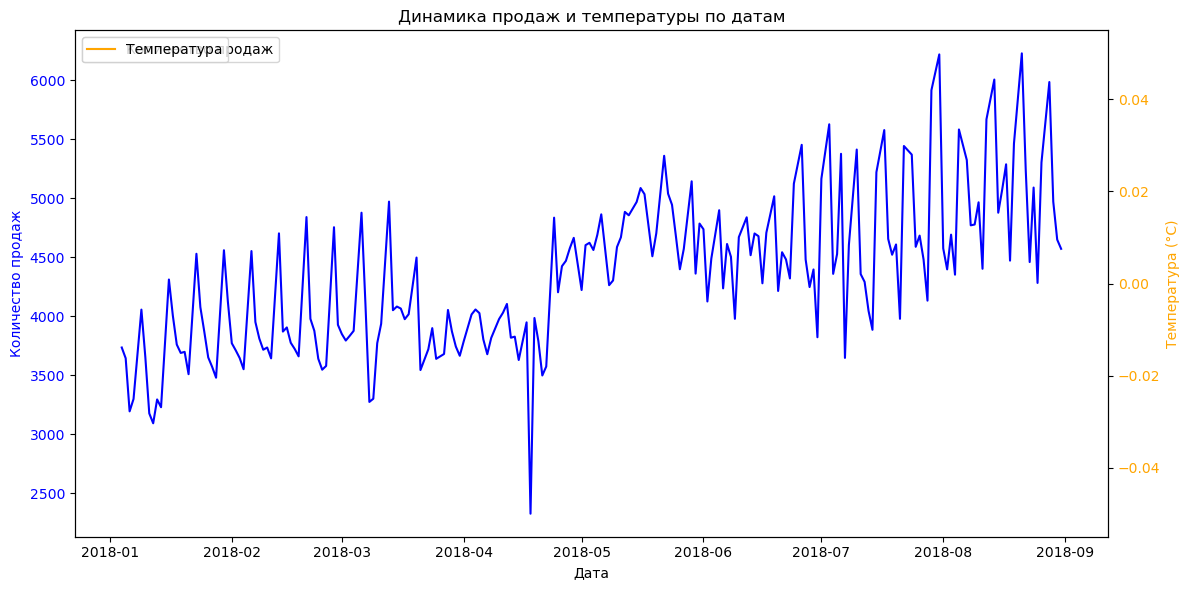

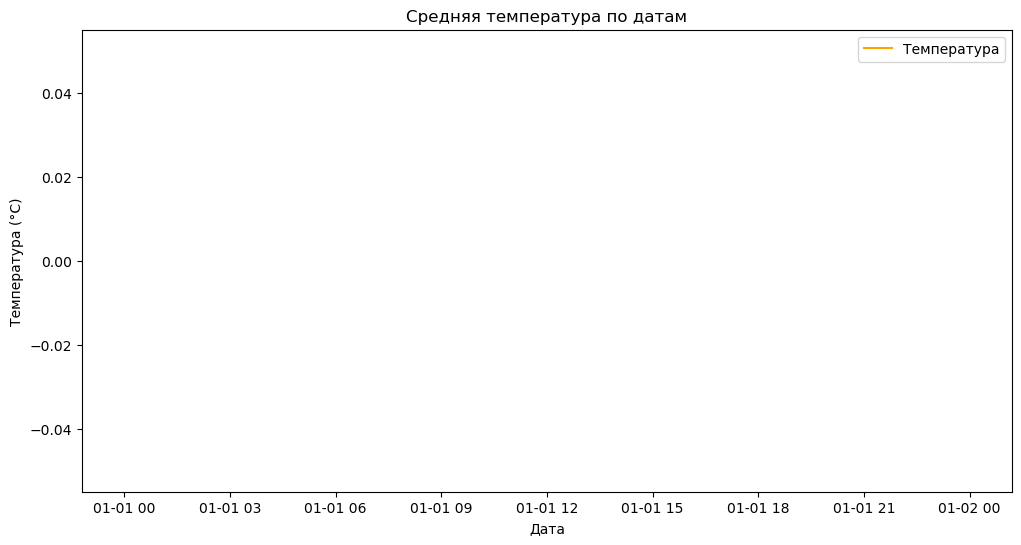

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Создаем фигуру и оси для двух графиков
fig, ax1 = plt.subplots(figsize=(12, 6))

# Первый график для количества продаж
sns.lineplot(data=combined_df, x='Дата', y='Количество', ax=ax1, label='Количество продаж', color='blue')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество продаж', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Второй график для температуры (создадим второй ось y)
ax2 = ax1.twinx()
sns.lineplot(data=combined_df, x='Дата', y='Средняя температура', ax=ax2, label='Температура', color='orange')
ax2.set_ylabel('Температура (°C)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Добавляем заголовок и легенду
plt.title('Динамика продаж и температуры по датам')
fig.tight_layout()  # Для корректного расположения
plt.legend(loc='upper left')
plt.show()

# Отдельный график для температуры
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_df, x='Дата', y='Средняя температура', color='orange', label='Температура')
plt.title('Средняя температура по датам')
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.legend()
plt.show()